### Yes vote ratio per States
I did simple analysis on how states respond to UN general assembly. <br>
I calculated the ratio of yes_vote per states and the conclusion is quite surprising

### Library

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)

In [2]:
state_file = os.path.join("../input/general-assembly","states.csv")
state_df = pd.read_csv(state_file) #none 값이 들어간 행 삭제
change_name = {'United States of America': "United States", "South Korea":"Korea, South", "North Korea":"Korea, North","German Democratic Republic":'Germany',"Myanmar":'Burma',"Yemen People's Republic":'Yemen'}
country_list= list(set(state_df['state_name'].dropna().values))

In [3]:
yes_vote_ratio = dict()
for country in country_list:
    new_df = state_df[state_df['state_name']==country]
    ratio = sum(new_df['yes_votes'])/sum(new_df['all_votes'])
    if country in change_name:
        country = change_name[country]
    yes_vote_ratio[country] = ratio

In [4]:
yes_vote_ratio

{'Ukraine': 0.7045497451387578,
 'New Zealand': 0.6015051740357479,
 'Austria': 0.6282314320886335,
 'Ecuador': 0.8582016773941876,
 'Kazakhstan': 0.8236009732360098,
 'Netherlands': 0.5200075145594589,
 'Mongolia': 0.8255734726322962,
 'Bahrain': 0.9324656188605108,
 'Paraguay': 0.7838427947598253,
 'German Federal Republic': 0.493196405648267,
 'South Africa': 0.6479536399855125,
 'Bangladesh': 0.9379163335997869,
 'Brazil': 0.8112958065734794,
 'Dominica': 0.8766756032171582,
 'Antigua & Barbuda': 0.9191232048374905,
 'San Marino': 0.6666666666666666,
 'Maldives': 0.9324045407636739,
 'El Salvador': 0.8227875160324926,
 'Libya': 0.8862083689154568,
 'Bhutan': 0.9121405750798722,
 'Canada': 0.5023456558453744,
 'South Sudan': 0.6709677419354839,
 'Guinea-Bissau': 0.9556067083196317,
 'Slovenia': 0.6365809922295278,
 'Latvia': 0.6034985422740525,
 'Tajikistan': 0.8410174880763116,
 'Belarus': 0.7421815408085431,
 'Botswana': 0.9237702807107906,
 'Azerbaijan': 0.8670926517571885,
 'Qat

In [5]:
countries_df = pd.DataFrame.from_dict(yes_vote_ratio, orient = 'index', columns=['yes_vote_ratio'])
code_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

def return_country_code(con):
    if con in code_df['COUNTRY'].values:
        return code_df[code_df['COUNTRY'] == con]['CODE'].values[0]

countries_df['Country'] = countries_df.index
countries_df['Code'] = countries_df['Country'].apply(return_country_code)
countries = countries_df.dropna()

In [6]:
data=dict(
    type = 'choropleth',
    locations = countries['Code'],
    z = countries['yes_vote_ratio'],
    text = countries['Country'],
    colorscale = 'YlOrRd',
    marker_line_color='darkgray',
    marker_line_width=0.7,
    colorbar_title = "yes_vote_ratio",
)

layout = dict(title_text='Yes vote ratio per States',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ))

fig = go.Figure(data = [data], layout = layout)
iplot(fig)

#### Can someone explain why western countries like US, European cast more "no" votes than Asia, African countries?

### five permanent members of the United Nations Security Council

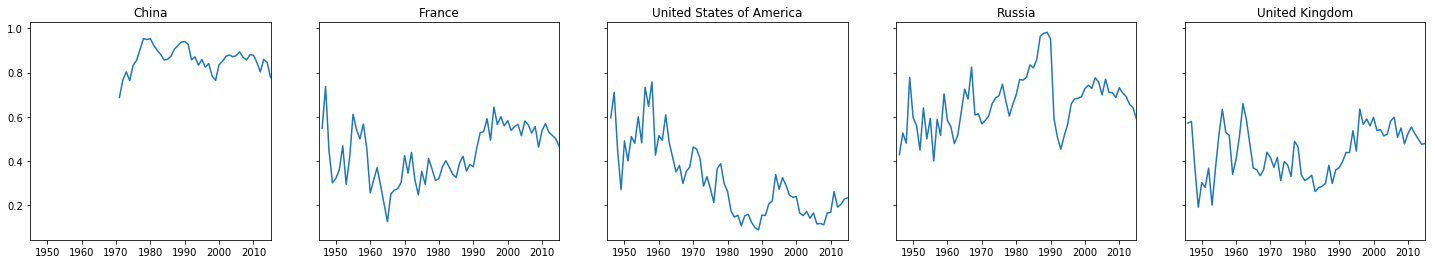

In [7]:
top_countries = ["China","France","United States of America","Russia","United Kingdom"]
fig, axs = plt.subplots(nrows=1, ncols=5, sharex = False, sharey = True, figsize=(25,4))
for i, country in enumerate(top_countries):
    new_df = state_df[state_df['state_name'] == country]
    ax = axs[i]
    ax.set_xlim(1945,2015)
    ax.plot(new_df['year'], new_df['yes_votes'].values/new_df['all_votes'].values)
    ax.set_title(str(country))
plt.show()

### Merge 2 database

In [8]:
resolution_df = pd.read_csv("../input/general-assembly/resolutions.csv").dropna()
data_df = pd.read_csv("../input/general-assembly/votes.csv")
merge_df = pd.merge(data_df, resolution_df[['resolution', 'vote_date',"colonization","human_rights","israel_palestine", "disarmament", "nuclear_weapons", "economic_development"]], on="resolution")

vote_respond = {1:"Yes", 2:"No", 3:"Abstain", 8:"Absent", 9:"Not a Member"}
new_vote = [vote_respond[i] for i in merge_df['vote']]
merge_df['vote'] = new_vote
merge_df.tail()

,assembly_session,vote_id,resolution,state_code,state_name,member,vote,vote_date,colonization,human_rights,israel_palestine,disarmament,nuclear_weapons,economic_development
527167,39,2790,R/39/412,970,Nauru,0,Not a Member,12/3/1984,1.0,0.0,0.0,0.0,0.0,0.0
527168,39,2790,R/39/412,983,Marshall Islands,0,Not a Member,12/3/1984,1.0,0.0,0.0,0.0,0.0,0.0
527169,39,2790,R/39/412,986,Palau,0,Not a Member,12/3/1984,1.0,0.0,0.0,0.0,0.0,0.0
527170,39,2790,R/39/412,987,Federated States of Micronesia,0,Not a Member,12/3/1984,1.0,0.0,0.0,0.0,0.0,0.0
527171,39,2790,R/39/412,990,Samoa,1,Yes,12/3/1984,1.0,0.0,0.0,0.0,0.0,0.0
